<a href="https://colab.research.google.com/github/KarenYu729/Pytorch-Note/blob/note/pytorch_learning_note3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [27]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
torch.manual_seed(1)    # reproducible

**使用mnist数据集**

In [29]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = True   # set to False if you have downloaded

</br></br>

---
**torchvision.datasets.MNIST**


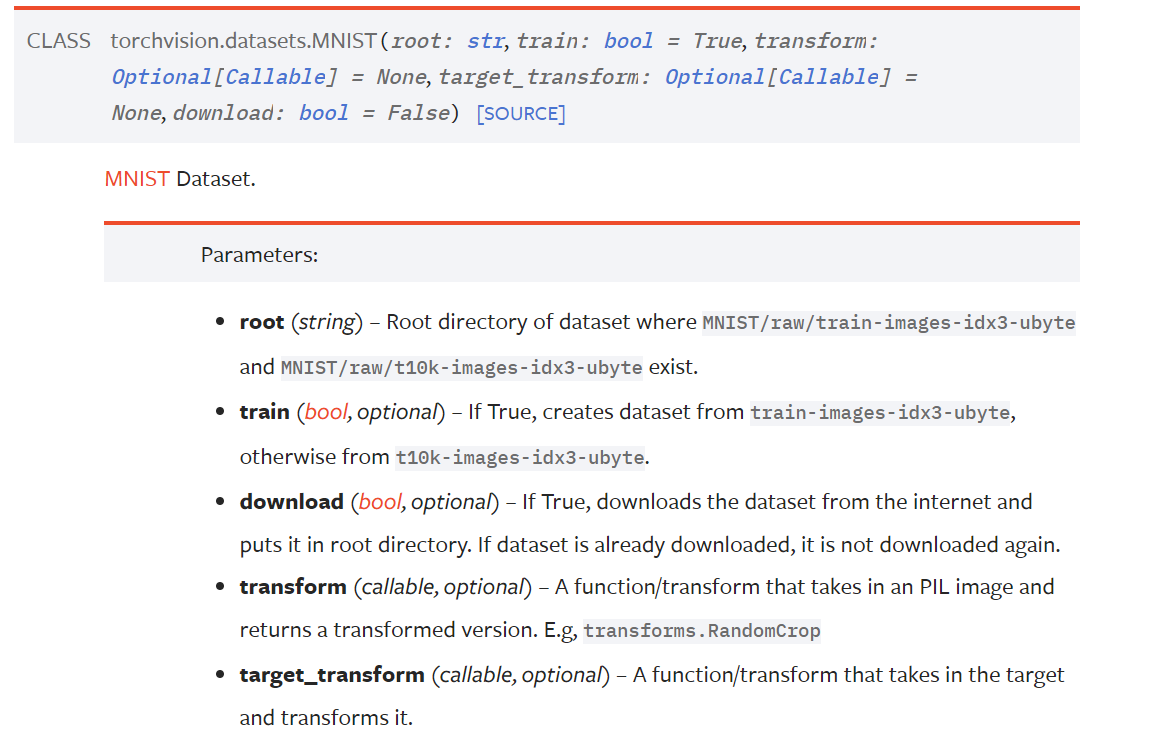


</br></br>


torchvision中datasets中所有封装的数据集都是torch.utils.data.Dataset的子类，它们都实现了__getitem__和__len__方法。因此，它们都可以用torch.utils.data.DataLoader进行数据加载。以datasets.MNIST类为例，具体参数和用法如下所示：

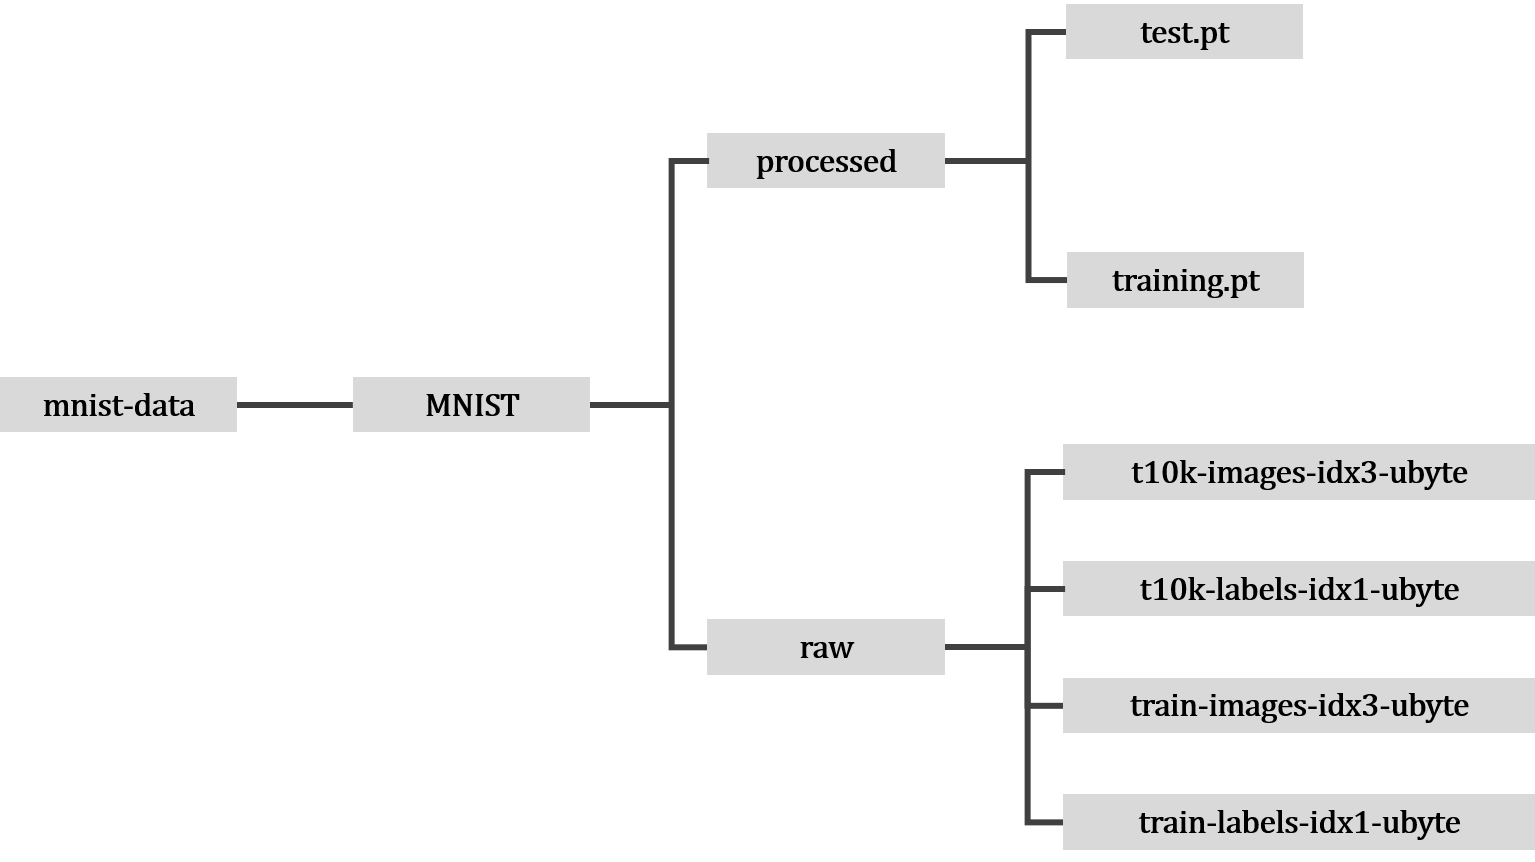


CLASS torchvision.datasets.MNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False)

root (string)： 表示数据集的根目录，其中根目录存在MNIST/processed/training.pt和MNIST/processed/test.pt的子目录

train (bool, optional)： 如果为True，则从training.pt创建数据集，否则从test.pt创建数据集

download (bool, optional)： 如果为True，则从internet下载数据集并将其放入根目录。如果数据集已下载，则不会再次下载

transform (callable, optional)： 接收PIL图片并返回转换后版本图片的转换函数

target_transform (callable, optional)： 接收PIL接收目标并对其进行变换的转换函数

datasets.MNIST(“mnist-data”)下载mnist数据集之后生成的目录结构如下所示


In [30]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



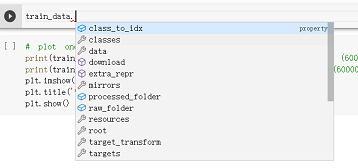


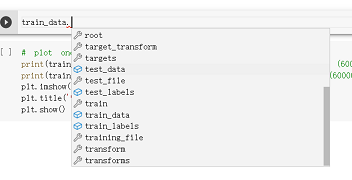

In [31]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
train_data.raw_folder

'./mnist/MNIST/raw'

In [ ]:
train_data.processed_folder

'./mnist/MNIST/processed'

In [ ]:
train_data.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
train_data.train_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
train_data.test_data.size()

torch.Size([60000, 28, 28])

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


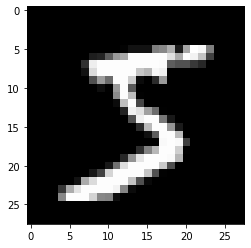

In [ ]:
plt.imshow(train_data.test_data[0].numpy(), cmap='gray')
plt.show()

torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


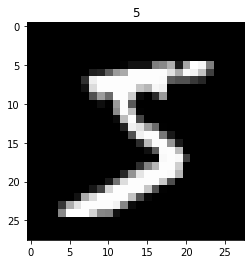

In [32]:
# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [33]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [34]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]
print(test_x.size())
print(test_y.size())

torch.Size([2000, 1, 28, 28])
torch.Size([2000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")




---
**nn.Sequential**

一个序列容器，用于搭建神经网络的模块被按照被传入构造器的顺序添加到nn.Sequential()容器中。除此之外，一个包含神经网络模块的OrderedDict也可以被传入nn.Sequential()容器中。利用nn.Sequential()搭建好模型架构，模型前向传播时调用forward()方法，模型接收的输入首先被传入nn.Sequential()包含的第一个网络模块中。然后，第一个网络模块的输出传入第二个网络模块作为输入，按照顺序依次计算并传播，直到nn.Sequential()里的最后一个模块输出结果。


In [ ]:
# Using Sequential to create a small model. When `model` is run,
# input will first be passed to `Conv2d(1,20,5)`. The output of
# `Conv2d(1,20,5)` will be used as the input to the first
# `ReLU`; the output of the first `ReLU` will become the input
# for `Conv2d(20,64,5)`. Finally, the output of
# `Conv2d(20,64,5)` will be used as input to the second `ReLU`
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

# Using Sequential with OrderedDict. This is functionally the
# same as the above code
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))


与一层一层的单独调用模块组成序列相比，nn.Sequential() 可以允许将整个容器视为单个模块（即相当于把多个模块封装成一个模块），forward()方法接收输入之后，nn.Sequential()按照内部模块的顺序自动依次计算并输出结果。


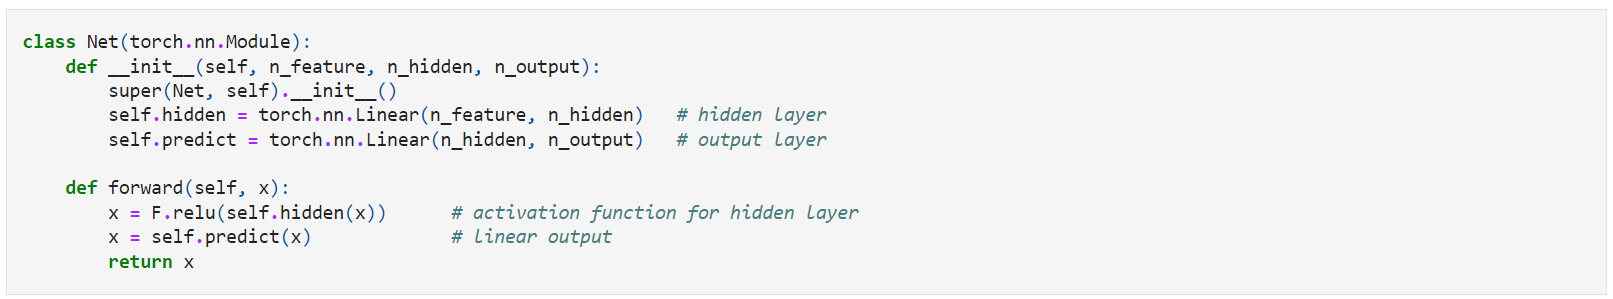

In [ ]:
from torch import nn


class net(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(net, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(in_channel, in_channel / 4, kernel_size=1),
                                    nn.BatchNorm2d(in_channel / 4),
                                    nn.ReLU())
        self.layer2 = nn.Sequential(nn.Conv2d(in_channel / 4, in_channel / 4),
                                    nn.BatchNorm2d(in_channel / 4),
                                    nn.ReLU())
        self.layer3 = nn.Sequential(nn.Conv2d(in_channel / 4, out_channel, kernel_size=1),
                                    nn.BatchNorm2d(out_channel),
                                    nn.ReLU())
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        return x




---

**nn.Conv2d**

CONV2D

CLASS

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

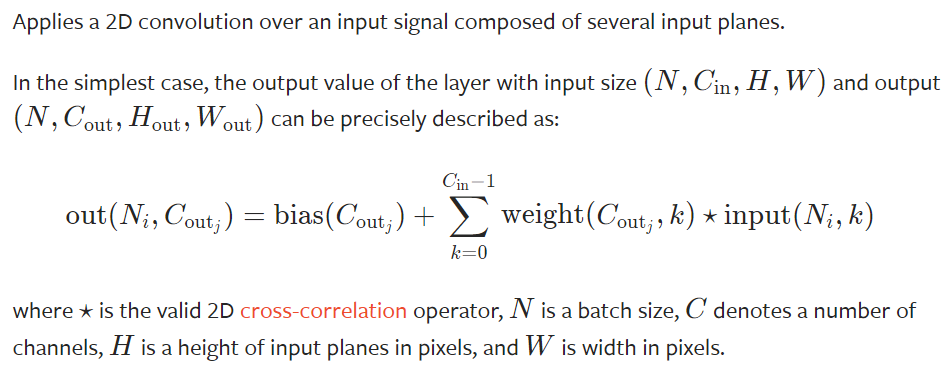

nn.Conv2d()的使用、形参与隐藏的权重参数
in_channels

out_channels

kernel_size

stride = 1

padding = 0

dilation = 1

groups = 1

bias = True

padding_mode = 'zeros'

</br></br>
in_channels

  这个很好理解，就是输入的四维张量[N, C, H, W]中的C了，即输入张量的channels数。这个形参是确定权重等可学习参数的shape所必需的。
</br></br>
out_channels

  也很好理解，即期望的四维输出张量的channels数，不再多说。
</br></br>
kernel_size

  卷积核的大小，一般我们会使用5x5、3x3这种左右两个数相同的卷积核，因此这种情况只需要写kernel_size = 5这样的就行了。如果左右两个数不同，比如3x5的卷积核，那么写作kernel_size = (3, 5)，注意需要写一个tuple，而不能写一个列表（list）。
</br></br>
stride = 1

  卷积核在图像窗口上每次平移的间隔，即所谓的步长。这个概念和Tensorflow等其他框架没什么区别，不再多言。
</br></br>
padding = 0

  Pytorch与Tensorflow在卷积层实现上最大的差别就在于padding上。

  Padding即所谓的图像填充，后面的int型常数代表填充的多少（行数、列数），默认为0。需要注意的是这里的填充包括图像的上下左右，以padding = 1为例，若原始图像大小为32x32，那么padding后的图像大小就变成了34x34，而不是33x33。

  Pytorch不同于Tensorflow的地方在于，Tensorflow提供的是padding的模式，比如same、valid，且不同模式对应了不同的输出图像尺寸计算公式。而Pytorch则需要手动输入padding的数量，当然，Pytorch这种实现好处就在于输出图像尺寸计算公式是唯一的

</br></br>
dilation = 1

  这个参数决定了是否采用空洞卷积，默认为1（不采用）。从中文上来讲，这个参数的意义从卷积核上的一个参数到另一个参数需要走过的距离，那当然默认是1了，毕竟不可能两个不同的参数占同一个地方吧（为0）。

  更形象和直观的图示可以观察Github上的Dilated convolution animations，展示了dilation=2的情况。
</br></br>
groups = 1

  决定了是否采用分组卷积，groups参数可以参考groups参数详解
</br></br>
bias = True

  即是否要添加偏置参数作为可学习参数的一个，默认为True。
</br></br>
padding_mode = ‘zeros’

  即padding的模式，默认采用零填充。


In [ ]:
class Net(nn.Module):
    def __init__(self):
        nn.Module.__init__(self)
        self.conv2d = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=4,stride=2,padding=1)

    def forward(self, x):
        print(x.requires_grad)
        x = self.conv2d(x)
        return x
net = Net()    
print(net.conv2d.weight)
print(net.conv2d.bias)


Parameter containing:
tensor([[[[ 0.0744, -0.0637, -0.0280,  0.0677],
          [-0.1359,  0.0866, -0.0297,  0.0734],
          [ 0.0201, -0.0177,  0.0400,  0.0071],
          [ 0.0527, -0.0562, -0.0105, -0.0130]],

         [[ 0.0209, -0.0006,  0.1262,  0.0449],
          [-0.0538, -0.0872, -0.0242, -0.0623],
          [-0.0463,  0.0069,  0.0860,  0.0785],
          [-0.1411,  0.0895,  0.0403,  0.1369]],

         [[ 0.0953, -0.1315, -0.1372, -0.0696],
          [ 0.1267, -0.0240,  0.0618, -0.0671],
          [ 0.1416, -0.0611,  0.1082,  0.0017],
          [-0.0760,  0.0742, -0.0766,  0.0425]]],


        [[[-0.0417, -0.0158, -0.1388, -0.0688],
          [ 0.0783, -0.0351,  0.1438,  0.1157],
          [-0.0068, -0.0963,  0.0879,  0.0448],
          [-0.0933,  0.0938,  0.0876,  0.1280]],

         [[-0.0809, -0.0238, -0.0028,  0.0211],
          [-0.1095, -0.1024,  0.0785, -0.0338],
          [ 0.0705,  0.0082,  0.0474,  0.0317],
          [ 0.0525,  0.0715, -0.1337,  0.0727]],

      



---

**torch.Tensor.view()**


形式：Tensor.view(*shape) → Tensor

作用：返回一个新的张量，其数据与自张量相同，但形状不同。(返回一个有相同数据但大小不同的tensor。 返回的tensor必须有与原tensor相同的数据和相同数目的元素，但可以有不同的大小。一个tensor必须是连续的contiguous()才能被查看。)


说明：返回的张量共享相同的数据，并且必须具有相同数量的元素，但可能具有不同的大小。

当不清楚是否可以执行 view() 时，建议使用 reshape()，如果形状兼容则返回视图，否则复制（相当于调用 contiguous()）。
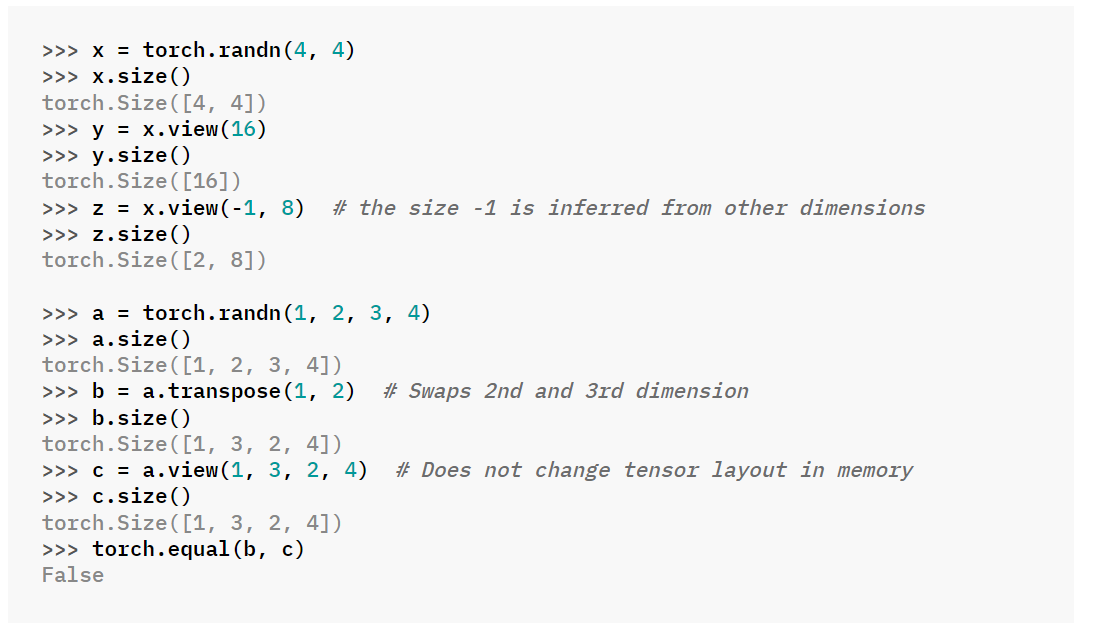

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
print('x\n', x)
print('y\n', y)

x
 tensor([[-0.8905, -0.4415, -1.7837,  0.7503],
        [-1.2369,  0.7097,  1.1345,  0.0381],
        [ 0.7875,  0.2436,  0.0166,  0.5730],
        [ 0.2333,  0.7155, -0.9739, -1.3842]])
y
 tensor([-0.8905, -0.4415, -1.7837,  0.7503, -1.2369,  0.7097,  1.1345,  0.0381,
         0.7875,  0.2436,  0.0166,  0.5730,  0.2333,  0.7155, -0.9739, -1.3842])


In [35]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [36]:
cnn = CNN()
print(cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [37]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

**plt.clf() 表示清除当前数字** 

**plt.ion()用于打开交互模式**


**TSNE**

TSNE目的：将高维数据降维并进行可视化，输入的数据为N个样本，每个样本具有M个特征（N_sample，M_feature）。输入的标签（N_sample，）。

Epoch:  0 | train loss: 2.3034 | test accuracy: 0.12


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


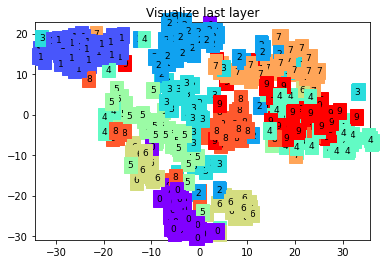

Epoch:  0 | train loss: 0.5555 | test accuracy: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


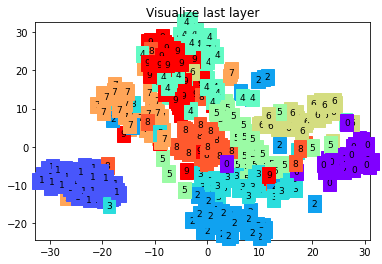

Epoch:  0 | train loss: 0.1278 | test accuracy: 0.94


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


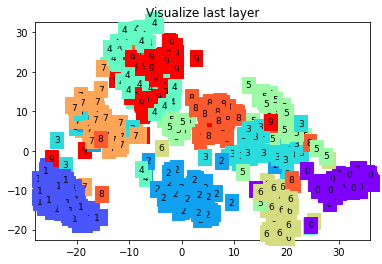

Epoch:  0 | train loss: 0.0557 | test accuracy: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


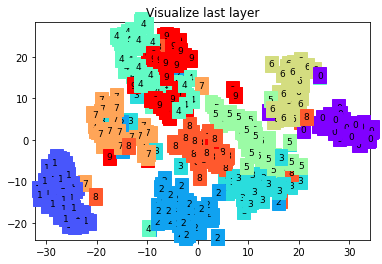

Epoch:  0 | train loss: 0.0350 | test accuracy: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


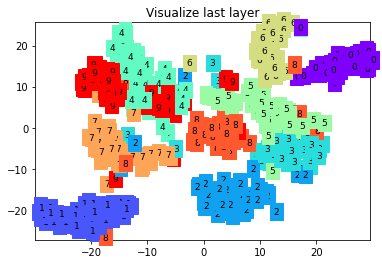

Epoch:  0 | train loss: 0.1830 | test accuracy: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


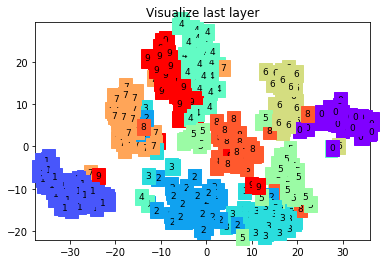

Epoch:  0 | train loss: 0.0186 | test accuracy: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


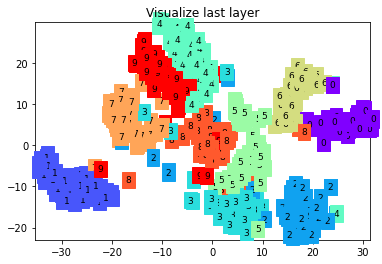

Epoch:  0 | train loss: 0.0945 | test accuracy: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


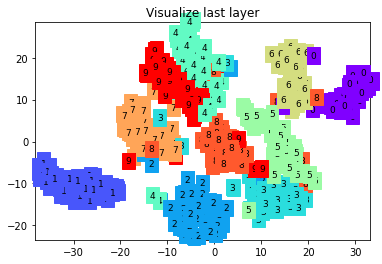

Epoch:  0 | train loss: 0.0387 | test accuracy: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


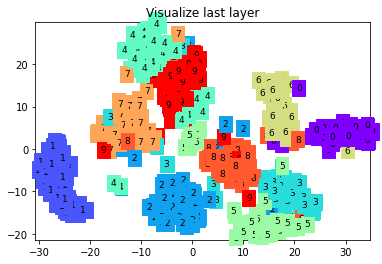

Epoch:  0 | train loss: 0.0954 | test accuracy: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


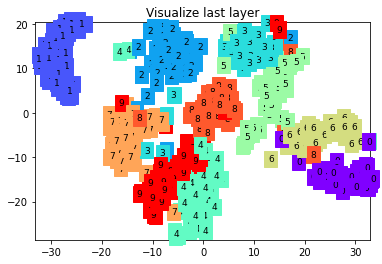

Epoch:  0 | train loss: 0.1963 | test accuracy: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


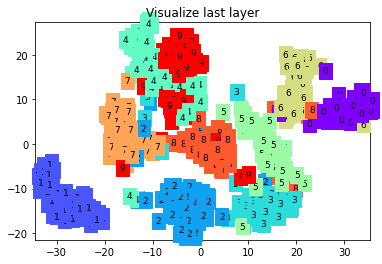

Epoch:  0 | train loss: 0.0201 | test accuracy: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


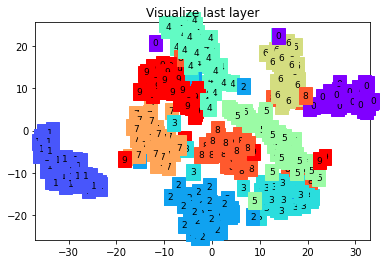

In [38]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

</br></br>
# RNN

In [40]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
torch.manual_seed(1)    # reproducible

**使用mnist数据集**

In [42]:
# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [44]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


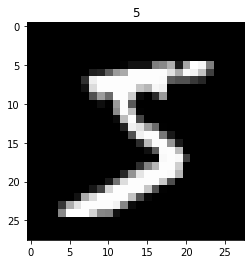

In [45]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [46]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [47]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


**构建模型**

**nn.LSTM**

输入的参数列表包括:

input_size 输入数据的特征维数，通常就是embedding_dim(词向量的维度)

hidden_size　LSTM中隐层的维度

num_layers　循环神经网络的层数

bias　用不用偏置，default=True

batch_first 这个要注意，通常我们输入的数据shape=(batch_size,seq_length,embedding_dim),而batch_first默认是False,所以我们的输入数据最好送进LSTM之前将batch_size与seq_length这两个维度调换

dropout　默认是0，代表不用dropout

bidirectional默认是false，代表不用双向LSTM



In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
 
torch.manual_seed(1)
 
lstm = nn.LSTM(3, 3)  # 输入单词用一个维度为3的向量表示, 隐藏层的一个维度3，仅有一层的神经元，
#记住就是神经元，这个时候神经层的详细结构还没确定，仅仅是说这个网络可以接受[seq_len,batch_size,3]的数据输入
print(lstm.all_weights)
 
inputs = [torch.randn(1, 3) for _ in range(5)]
 # 构造一个由5个单单词组成的句子 构造出来的形状是 [5,1,3]也就是明确告诉网络结构我一个句子由5个单词组成，
#每个单词由一个1X3的向量组成，就是这个样子[1,2,3] 
#同时确定了网络结构，每个批次只输入一个句子，其中第二维的batch_size很容易迷惑人
#对整个这层来说，是一个批次输入多少个句子，具体但每个神经元，就是一次性喂给神经元多少个单词。
print('Inputs:',inputs)
 
# 初始化隐藏状态
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
print('Hidden:',hidden)
for i in inputs:
 # 将序列的元素逐个输入到LSTM，这里的View是把输入放到第三维，看起来有点古怪，
#回头看看上面的关于LSTM输入的描述，这是固定的格式，以后无论你什么形式的数据，
#都必须放到这个维度。就是在原Tensor的基础之上增加一个序列维和MiniBatch维，
#这里可能还会有迷惑，前面的1是什么意思啊，就是一次把这个输入处理完，
#在输入的过程中不会输出中间结果，这里注意输入的数据的形状一定要和LSTM定义的输入形状一致。
    # 经过每步操作,hidden 的值包含了隐藏状态的信息
 out, hidden = lstm(i.view(1, 1, -1), hidden)
print('out1:',out)
print('hidden2:',hidden)
# 另外, 我们还可以一次对整个序列进行训练. LSTM 返回的第一个值表示所有时刻的隐状态值,
# 第二个值表示最近的隐状态值 (因此下面的 "out"的最后一个值和 "hidden" 的值是一样的).
# 之所以这样设计, 是为了通过 "out" 的值来获取所有的隐状态值, 而用 "hidden" 的值来
# 进行序列的反向传播运算, 具体方式就是将它作为参数传入后面的 LSTM 网络.
 
# 增加额外的第二个维度
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print('out2',out)
print('hidden3',hidden)

[[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119],
        [ 0.2710, -0.5435,  0.3462],
        [-0.1188,  0.2937,  0.0803],
        [-0.0707,  0.1601,  0.0285],
        [ 0.2109, -0.2250, -0.0421],
        [-0.0520,  0.0837, -0.0023],
        [ 0.5047,  0.1797, -0.2150],
        [-0.3487, -0.0968, -0.2490],
        [-0.1850,  0.0276,  0.3442],
        [ 0.3138, -0.5644,  0.3579],
        [ 0.1613,  0.5476,  0.3811],
        [-0.5260, -0.5489, -0.2785]], requires_grad=True), Parameter containing:
tensor([[ 0.5070, -0.0962,  0.2471],
        [-0.2683,  0.5665, -0.2443],
        [ 0.4330,  0.0068, -0.3042],
        [ 0.2968, -0.3065,  0.1698],
        [-0.1667, -0.0633, -0.5551],
        [-0.2753,  0.3133, -0.1403],
        [ 0.5751,  0.4628, -0.0270],
        [-0.3854,  0.3516,  0.1792],
        [-0.3732,  0.3750,  0.3505],
        [ 0.5120, -0.3236, -0.0950],
        [-0.0112,  0.0843, -0.4382],
        [-0.4097,  0.3141, -0.1354]], requires_grad=True), Parameter containing:


In [48]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [49]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


**nn.CrossEntropyLoss()**

在pytorch中nn.CrossEntropyLoss()为交叉熵损失函数，用于解决多分类问题，也可用于解决二分类问题。在使用nn.CrossEntropyLoss()其内部会自动加上Sofrmax层

创建一下数据



```
import torch.nn as nn
import torch

x = torch.rand((3,3))
y = torch.tensor([0,1,1])

#x的值
#tensor([[0.7459, 0.5881, 0.4795],
#        [0.2894, 0.0568, 0.3439],
#        [0.6124, 0.7558, 0.4308]])

#y的值
#tensor([0, 1, 1])

```



先经过softmax函数，求出每个类别的概率值，取值到0-1之间


```
softmax = nn.Softmax()
x_softmax = softmax(x)

#x_softmax
>>>tensor([[0.3817, 0.3259, 0.2924],
        [0.3511, 0.2782, 0.3707],
        [0.3346, 0.3863, 0.2791]])

```

再经过log函数，取对数，原来的变化趋势保持不变，但所有值都会变成负的，原来概率大的，成为负值也大，但是它取绝对值后就是最小的，我们想要的是最小损失，正好贴合


```
x_log = torch.log(x_softmax)

>>>tensor([[-0.9632, -1.1211, -1.2297],
        [-1.0468, -1.2794, -0.9923],
        [-1.0947, -0.9512, -1.2762]])

```


上边两步，可以直接用函数nn.LogSoftmax代替;可以看出两个结果相同

```
ls = nn.LogSoftmax(dim=1)
ls(x)

>>>tensor([[-0.9632, -1.1211, -1.2297],
        [-1.0468, -1.2794, -0.9923],
        [-1.0947, -0.9512, -1.2762]])

```

最后使用nn.NLLLoss函数求损失

```
loss = x_log[range(len(x)),y]  #取出每一个样本标签值处的概率
loss = abs(sum(loss)/len(x))

#loss
>>>tensor(1.0646)

```


我们直接使用nn.CrossEntropyLoss进行一下验证

```
loss_func = nn.CrossEntropyLoss()
loss_func(x,y)

>>>tensor(1.0646)

```




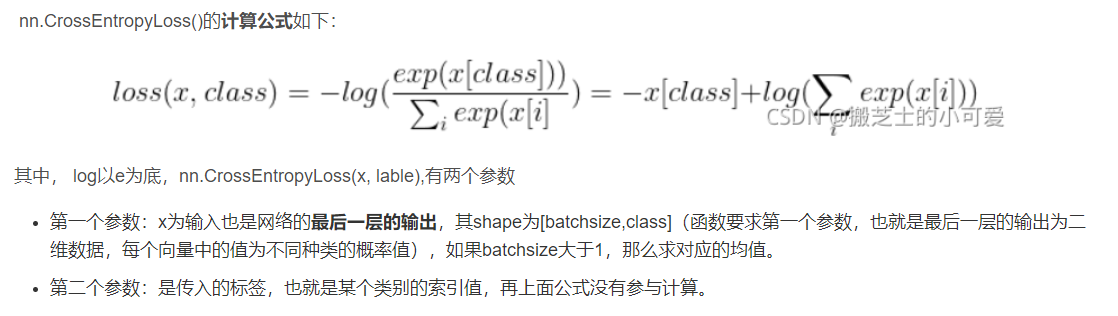



In [50]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()     

In [52]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.2938 | test accuracy: 0.09
Epoch:  0 | train loss: 1.0791 | test accuracy: 0.60
Epoch:  0 | train loss: 0.3923 | test accuracy: 0.72
Epoch:  0 | train loss: 0.5933 | test accuracy: 0.81
Epoch:  0 | train loss: 0.3444 | test accuracy: 0.86
Epoch:  0 | train loss: 0.3129 | test accuracy: 0.90
Epoch:  0 | train loss: 0.4800 | test accuracy: 0.87
Epoch:  0 | train loss: 0.1713 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2529 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1512 | test accuracy: 0.92
Epoch:  0 | train loss: 0.3591 | test accuracy: 0.92
Epoch:  0 | train loss: 0.3772 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0857 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1494 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1243 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1673 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0579 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1285 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0520 | test accuracy

In [53]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


</br></br>

# RNN Regressor

In [55]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
torch.manual_seed(1)    # reproducible

In [57]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

**generate data**

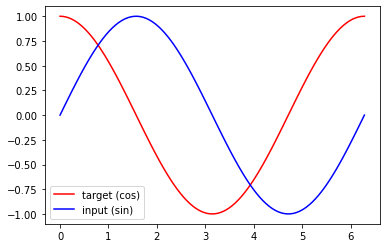

In [58]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

**generate model**



1. 初始化RNN

rnn = nn.RNN(input_size, hidden_size, num_layers)

2. RNN的输入

input：(seq_len, batch_size, input_size)

h0：(num_layers, batch_size, hidden_size)

注：

a. h0如果没有被提供，则默认设置为全0

b. 实际上h0维度是(num_layers*num_directions, batch_size, hidden_size)，如果RNN是单向的，则num_directions=1；如果RNN是双向的，则num_directions=2，此处取单向RNN。

3. RNN输出

output：(seq_len, batch_size, hidden_size)

为每个时间步得到的hidden_state

hn：(num_layers, batch_size, hidden_size)

为最后一个时间步的hidden_state

注 ：

a. 实际output维度是(seq_len, batch_size, num_directions * hidden_size)

b. 实际hn维度是(num_layers * num_directions, batch_size, hidden_size)

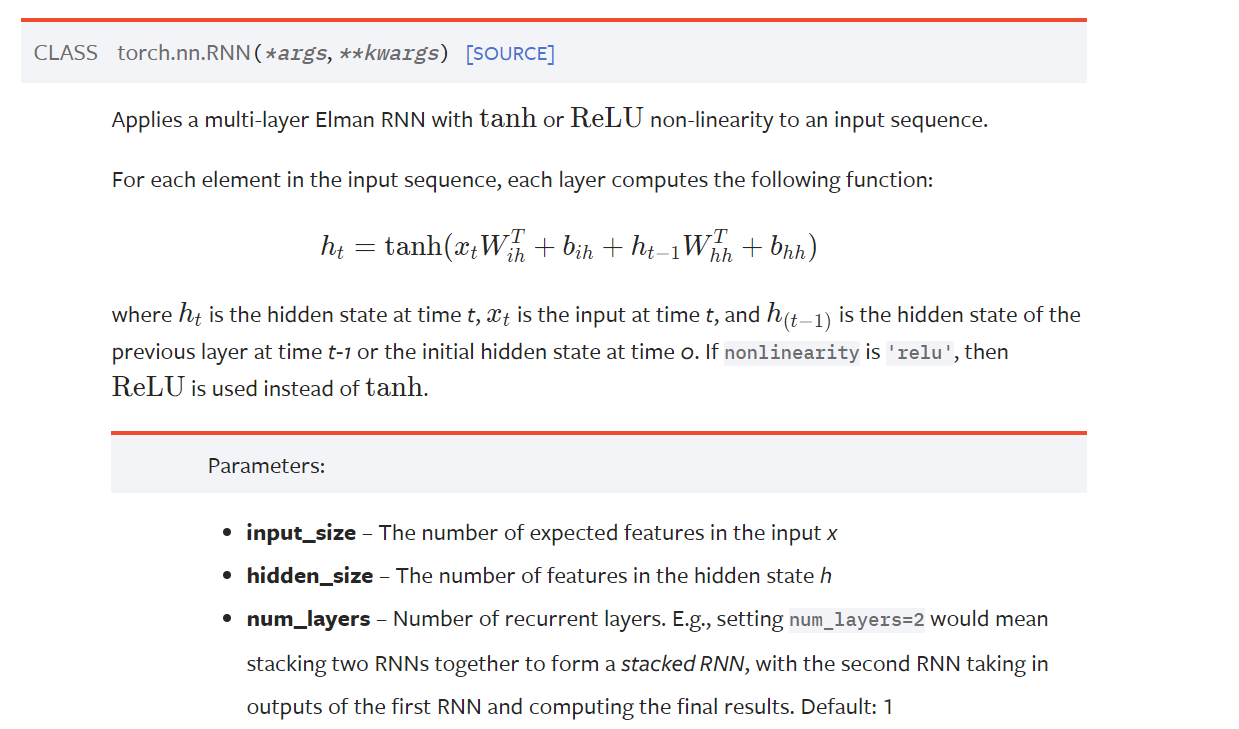

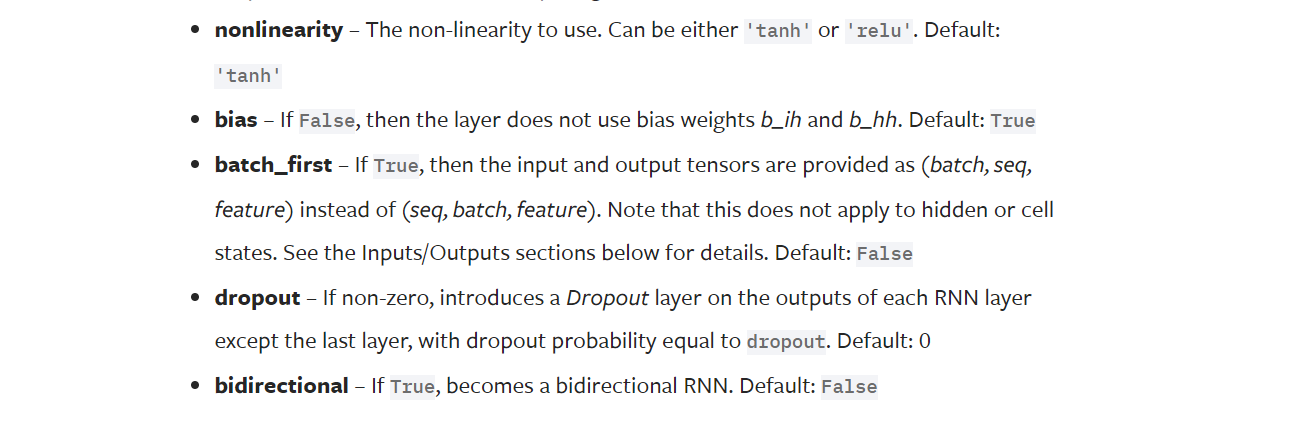

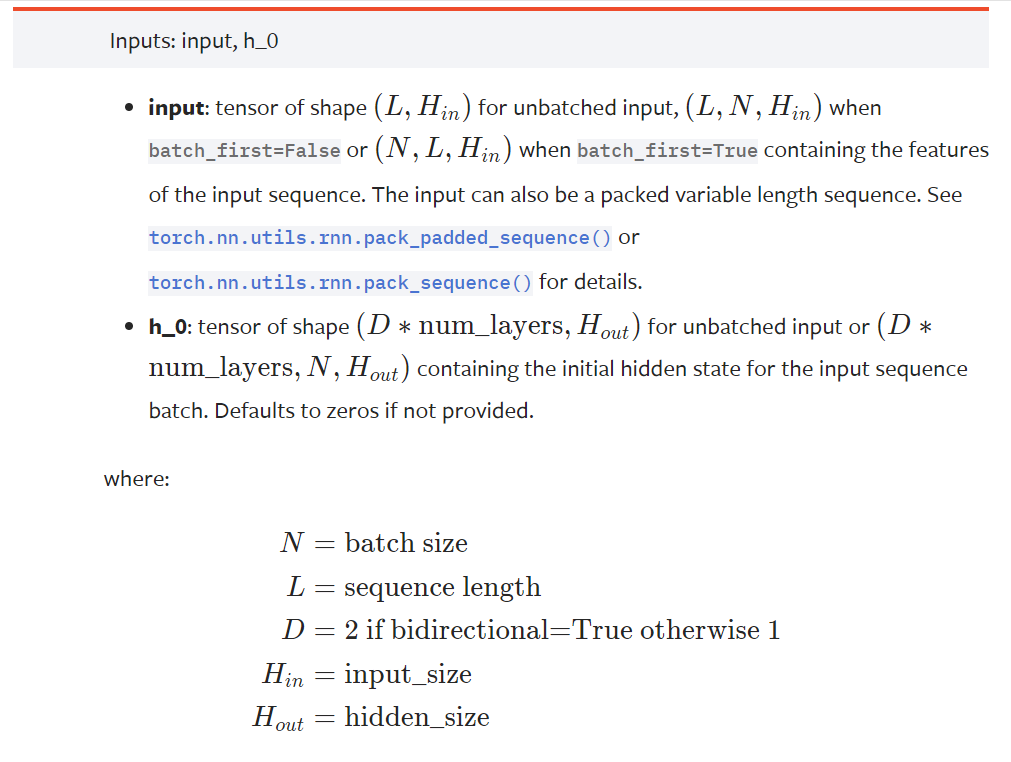

input_size： 输入特征的维度， 一般rnn中输入的是词向量，那么 input_size 就等于一个词向量的维度。

hidden_size： 隐藏层神经元个数，或者也叫输出的维度（因为rnn输出为各个时间步上的隐藏状态）。

num_layers：网络的层数。

nonlinearity：激活函数。

bias：是否使用偏置。

batch_first：输入数据的形式，默认是 False，就是这样形式，(seq(num_step), batch, input_dim)，也就是将序列长度放在第一位，batch 放在第二位。

dropout：是否应用dropout, 默认不使用，如若使用将其设置成一个0-1的数字即可。

birdirectional：是否使用双向的 rnn，默认是 False。


In [54]:
import torch
import torch.nn as nn

# 输入维度5， 隐藏层维度10， 一层网络
rnn = nn.RNN(5, 10, 1)

# 初始化 input - one_hot 编码, 时间步数=2, batch_size=1, input_size=5,

input = torch.tensor([[0, 1, 0, 0, 0],
                      [0, 0, 0, 1, 0]], dtype=torch.float32)

print(input.size())

# 扩展 batch_size 维度为 1
input = input.unsqueeze(1)
print("输入维度")
print(input.size())

# 初始化 h_0 - (D, N, H_out)
hidden = torch.randn(1, 1, 10)
print(hidden.size())

# 调用 rnn
output, h_n = rnn(input, hidden)

print("输出维度")
print(output.size())
print(h_n.size())


torch.Size([2, 5])
输入维度
torch.Size([2, 1, 5])
torch.Size([1, 1, 10])
输出维度
torch.Size([2, 1, 10])
torch.Size([1, 1, 10])


In [59]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [60]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [61]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

In [62]:
h_state = None      # for initial hidden state

In [63]:
plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

<Figure size 864x360 with 0 Axes>

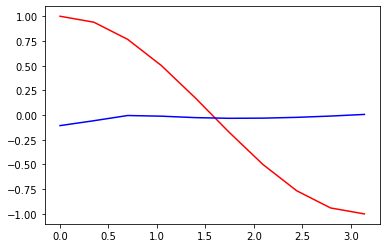

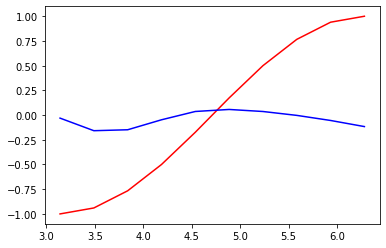

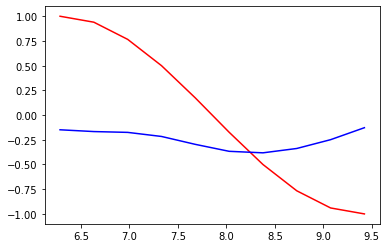

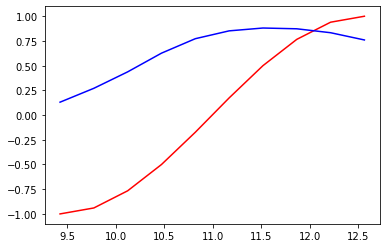

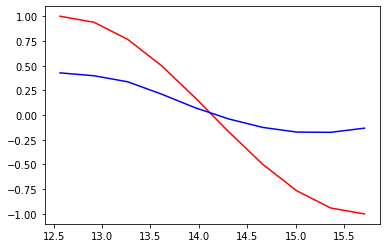

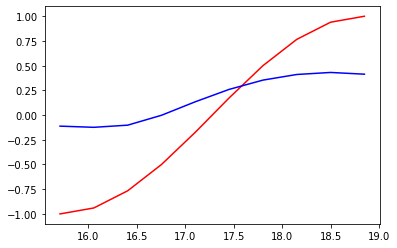

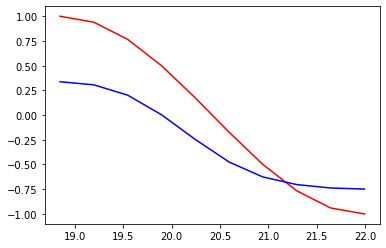

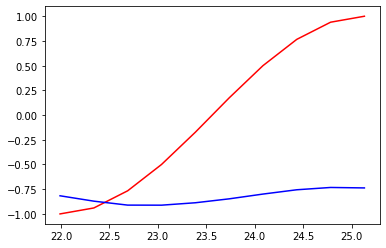

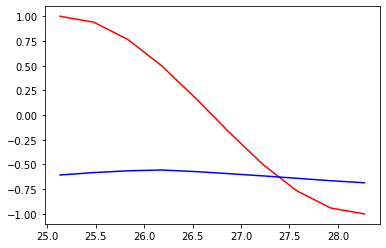

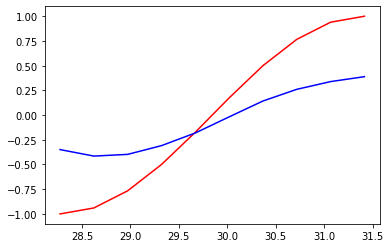

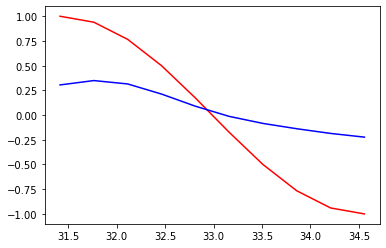

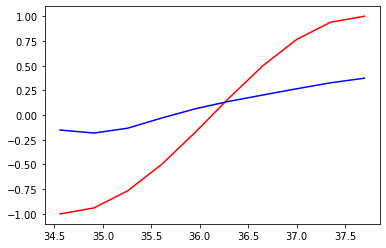

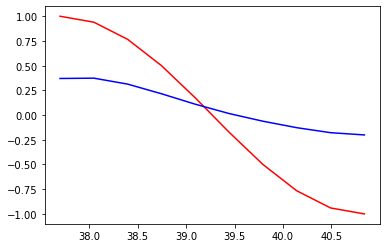

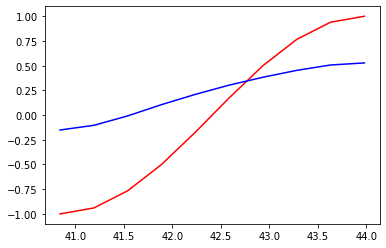

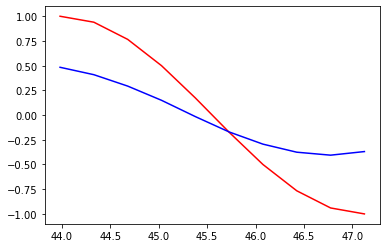

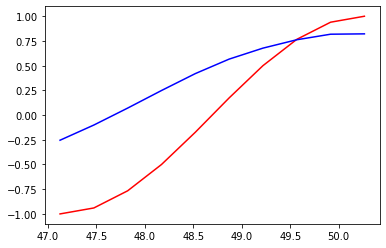

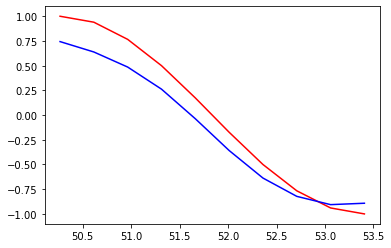

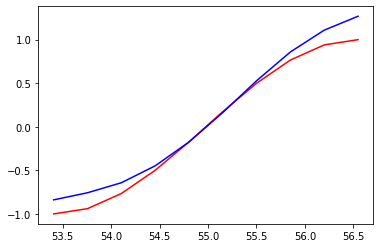

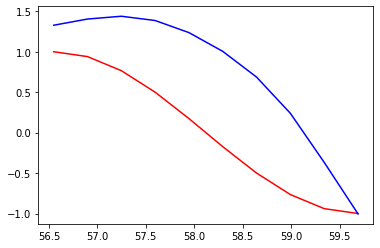

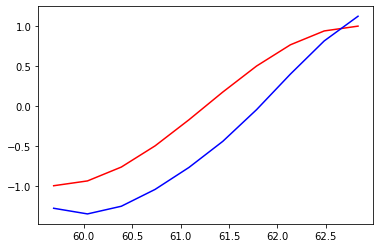

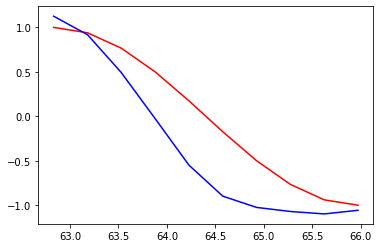

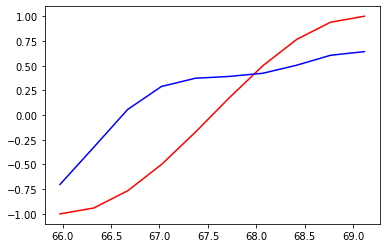

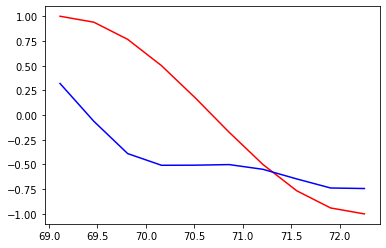

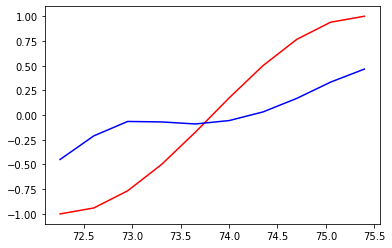

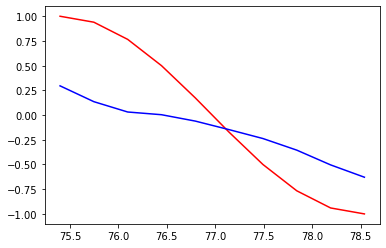

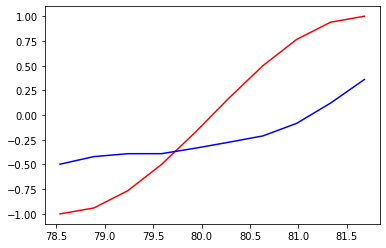

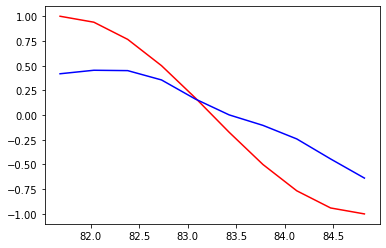

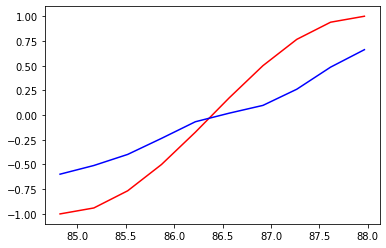

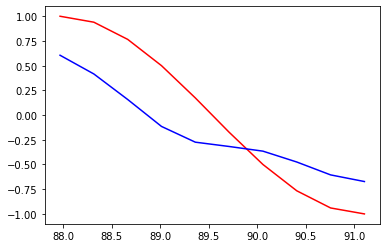

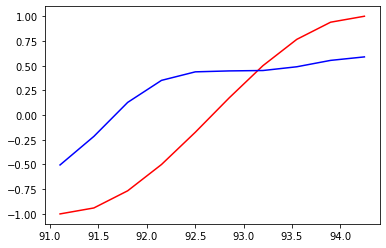

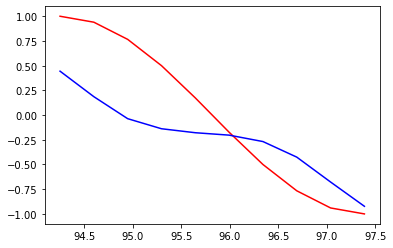

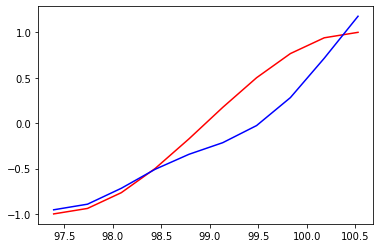

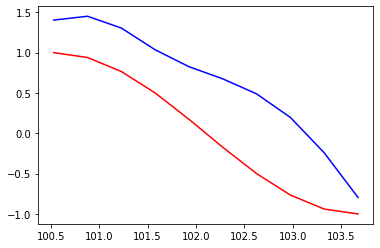

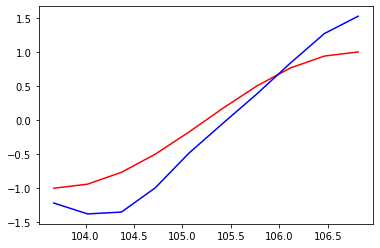

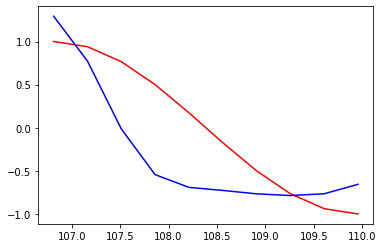

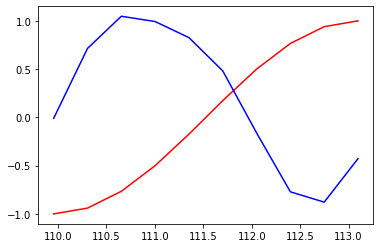

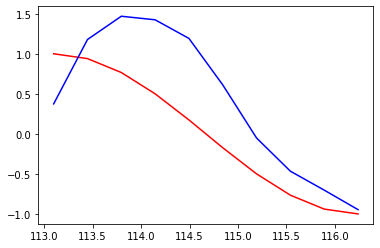

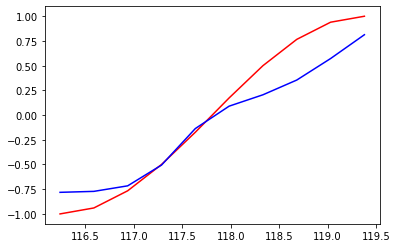

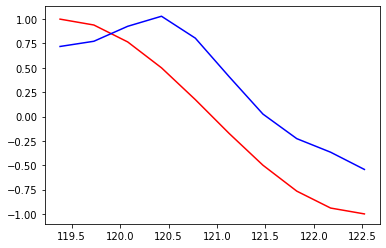

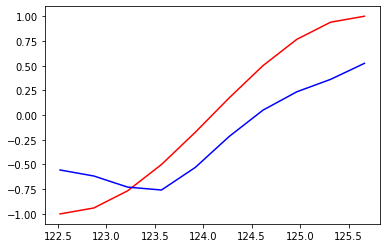

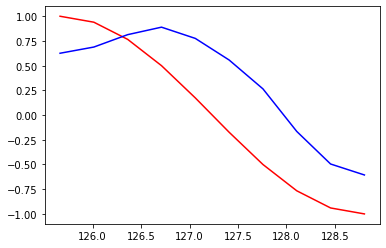

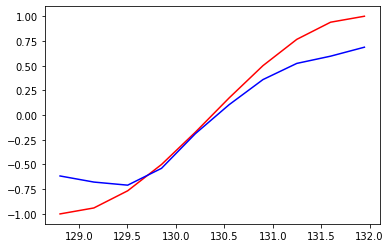

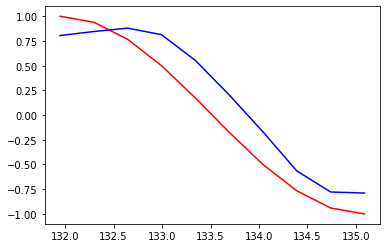

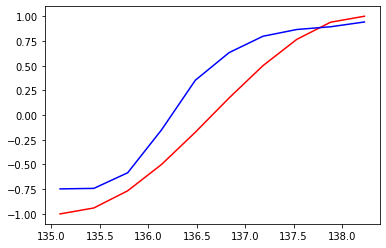

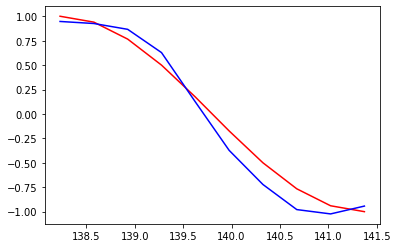

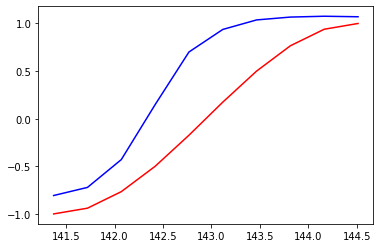

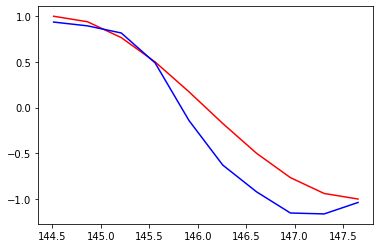

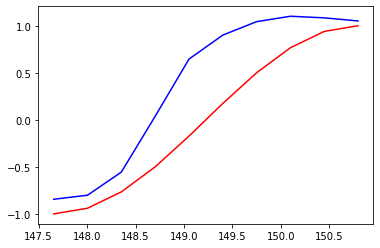

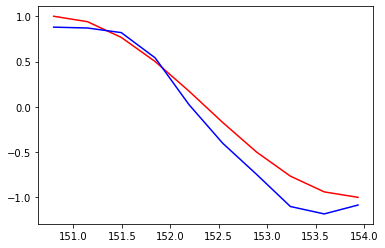

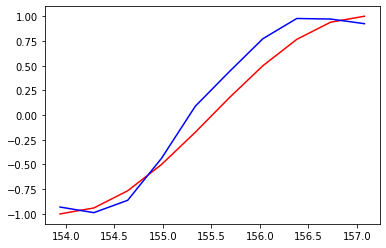

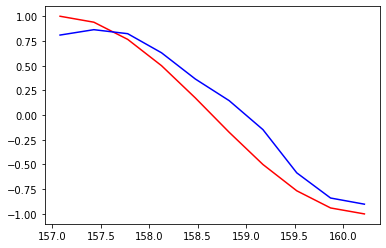

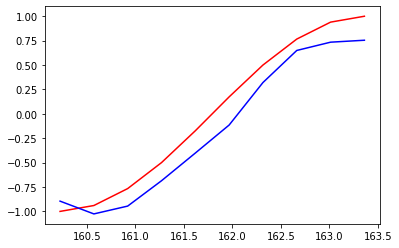

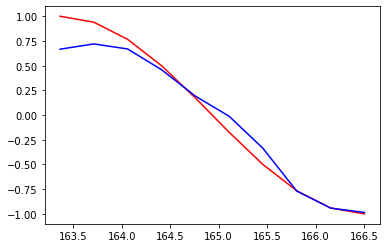

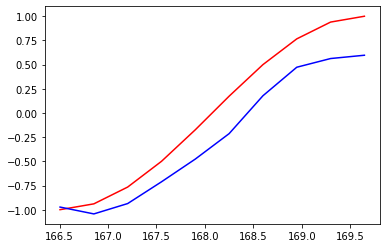

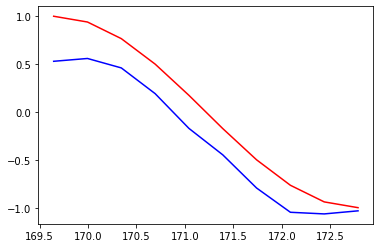

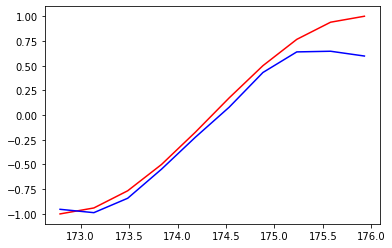

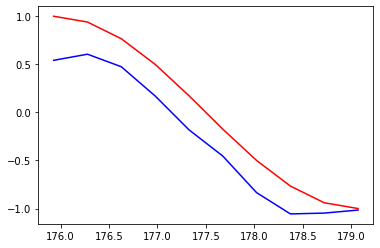

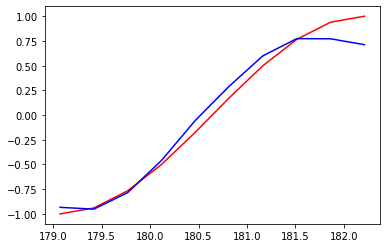

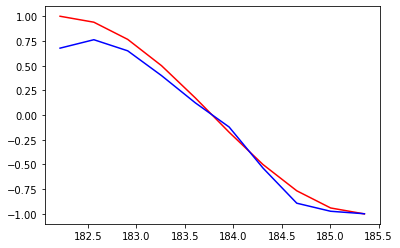

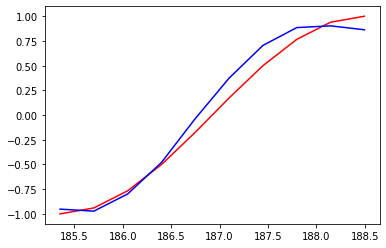

In [64]:
for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)